In [197]:
import yfinance as yf

import numpy as np

import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

In [199]:
data = yf. download("AAPL" , start = "2022-04-20" , interval = '1d')
data. head ()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-20,168.759995,168.880005,166.100006,167.229996,166.223068,67929800
2022-04-21,168.910004,171.529999,165.910004,166.419998,165.417938,87227800
2022-04-22,166.460007,167.869995,161.500000,161.789993,160.815826,84882400
2022-04-25,161.119995,163.169998,158.460007,162.880005,161.899261,96046400
2022-04-26,162.250000,162.339996,156.720001,156.800003,155.855881,95623200


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-20 to 2023-04-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [201]:
data["Close"]=pd.to_numeric(data.Close, errors='coerce')
data.isnull () .sum () .sum ()

0

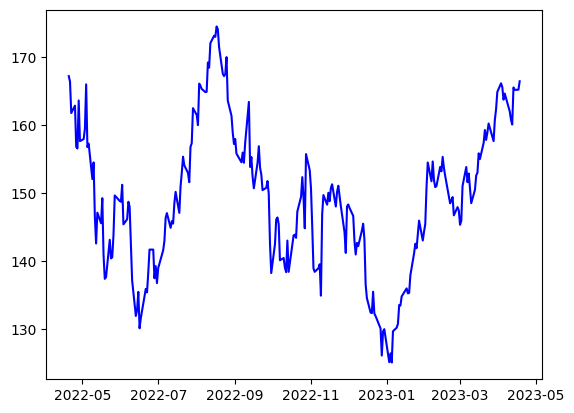

In [202]:
plt.plot (data.index, data['Close'], color='blue', label='Close')
plt.show ()

In [203]:
dataV1 = data.iloc[:, 3:4]
dataV1 = dataV1.values

In [204]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler (feature_range=(0,1))
dataV1 = Scaler.fit_transform (dataV1)

In [205]:
feature_length=100

In [206]:
def Create_Features_and_Targets(data,feature_length):
    X = list ()
    Y = list()
    for i in range(len(data) - feature_length-1): 
        X.append(data[i: (i + feature_length),0])
        Y.append (data[i + feature_length, 0])
    X = np.array(X)
    Y = np.array(Y)
    return X,Y
X_train,y_train= Create_Features_and_Targets(dataV1,feature_length)

In [207]:
X_train = np.reshape(X_train, (X_train.shape[0] ,X_train. shape [1], 1))
X_train.shape, y_train.shape

((149, 100, 1), (149,))

In [208]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense , Dropout , LSTM 
from tensorflow import keras

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.model.selection import train_test_split
#from sklearn.model.selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [209]:
model = Sequential( [
    LSTM(100, return_sequences=True, input_shape=(X_train.shape [1], 1)),
    Dropout (0.3),
    LSTM(100, return_sequences = False),
    Dropout (0.3),
    Dense (1),
])
model.compile (optimizer='adam', loss="mean_squared_error")
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_22 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [210]:
history = model.fit(X_train,y_train,epochs = 100,batch_size= 12,verbose=1)


Epoch 1/100


Exception ignored in: <function UniquePtr.__del__ at 0x00000138456BA520>
Traceback (most recent call last):
  File "c:\Users\madhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\framework\c_api_util.py", line 74, in __del__
    self.deleter(obj)
KeyboardInterrupt: 


13/13 [==============================] - 11s 213ms/step - loss: 0.0676
Epoch 2/100
13/13 [==============================] - 3s 195ms/step - loss: 0.0258
Epoch 3/100
13/13 [==============================] - 3s 199ms/step - loss: 0.0148
Epoch 4/100
13/13 [==============================] - 2s 178ms/step - loss: 0.0144
Epoch 5/100
13/13 [==============================] - 2s 175ms/step - loss: 0.0131
Epoch 6/100
13/13 [==============================] - 2s 187ms/step - loss: 0.0119
Epoch 7/100
13/13 [==============================] - 2s 187ms/step - loss: 0.0113
Epoch 8/100
13/13 [==============================] - 2s 175ms/step - loss: 0.0146
Epoch 9/100
13/13 [==============================] - 2s 191ms/step - loss: 0.0149
Epoch 10/100
13/13 [==============================] - 2s 187ms/step - loss: 0.0101
Epoch 11/100
13/13 [==============================] - 2s 171ms/step - loss: 0.0094
Epoch 12/100
13/13 [==============================] - 2s 169ms/step - loss: 0.0096
Epoch 13/100
13/13 [====

In [211]:
testData = data.iloc[:,3:4] 
y_real=testData.iloc[ feature_length+1:,0:].values 
x_test = testData.iloc[:,0:].values 
x_test = Scaler.transform(x_test)
x_test,y_test = Create_Features_and_Targets(x_test, feature_length)
x_test = np. reshape (x_test, (x_test.shape[0],x_test.shape [1],1))

In [212]:
y_pred = model.predict (x_test)
predicted_price = Scaler.inverse_transform (y_pred)

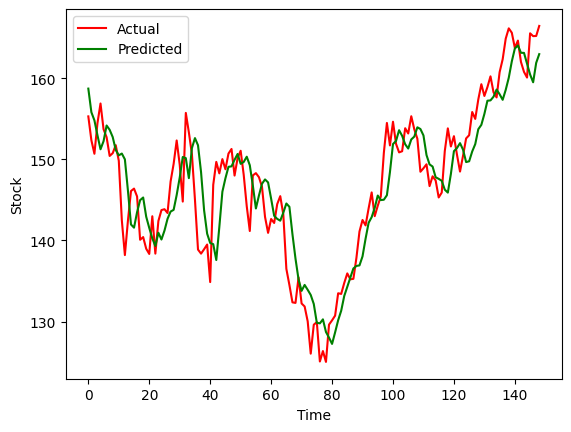

In [213]:
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color ='green', label = 'Predicted')
plt.xlabel ('Time' ) 
plt.ylabel ('Stock')
plt. legend ()
plt.show ()

In [214]:
def predict_given_date(data, date, feature_length):
    if date not in data.index:
        data.loc[pd.Timestamp (date)] = 0
    idx= data.index.get_loc(date)
    close_col = data.iloc[:,3:4]
    close_col = close_col.iloc[idx - feature_length: idx, :].values 
    close_col = np.expand_dims(Scaler.transform(close_col), axis = 0)
    Prediction = model.predict(close_col)
    Prediction = Scaler.inverse_transform (Prediction)
    return Prediction
predict_given_date(data, '2023-04-19', feature_length)

array([[164.21269]], dtype=float32)

In [215]:
l= data.index.get_loc('2023-04-19')
data.iloc[1: 1+1,:]['Close']

Date
2022-04-21    166.419998
Name: Close, dtype: float64